# Methods of Component Analysis

In [ ]:
# to check distribution
# df = dataset; hue=for color to the classifical type
sns.pairplot(df,x_vars=['Age','YearsExperience'],y_vars=['Salary'],hue='Gender')
sns.pairplot(df[['father','mother','mid','male','female','gender','height']],hue='gender')
# regression
sns.regplot(y_test,predictions)
# distribution
sns.distplot(predictions,bins=6)
# residual 
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),scatter_kws={"s": 80}) # s=size
# heatmap
sns.heatmap(df.corr(),annot=True,lw=1)
# boxplot
sns.boxplot(y='height',x='gender',data=df)

In [ ]:
# for data seperate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [ ]:
# for setting model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
# useful method
model.intercept_
model.coef_
model.predict(X)
model.score(X_test,y_test)


In [ ]:
# accuracy
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
# 模型末尾提示可能存在多元共线性，需要处理一下
# 自定义方差膨胀因子的检测公式
def vif(df, col_i):
    """
    df: 整份数据
    col_i：被检测的列名
    """
    cols = list(df.columns)
    cols.remove(col_i) # y=col_i , X=cols_noti
    cols_noti = cols
    formula = col_i + '~' + '+'.join(cols_noti)
    r2 = ols(formula, df).fit().rsquared # r2大表示 cols_noti 可取代 col_i
    return 1. / (1. - r2) # r2大(即 VIF大)表示 cols_noti 可取代 col_i

In [ ]:
import statsmodels.api as sm # restart
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
ls.params
# AIC、BIC
# https://zhuanlan.zhihu.com/p/369854364
print(ls.summary())
#  p < 0.05 表示此模型是可以預測的
# AIC,BIC較大較不好

In [ ]:
# useful for catalog dtype
pd.get_dummies(nominal_data)
from statsmodels.formula.api import ols
# before ~ is the column for Y C for dummy
fit = ols('Salary ~ C(Gender) + C(Job) + Age', data=df).fit() 
print(fit.summary())

In [ ]:
import numpy as np
std = np.std(data, ddof = 1)
var = np.var(data, ddof = 1)
tranM = X.T
innerproduct = X.T * X
correlation_matrix = zscores.T@zscores/(zscores.shape[0] - 1)
projections = zscores @ eigenvectors
def feature_normalize(X):
    """
    Normalizes the features(input variables) in X.

    Parameters
    ----------
    X : n dimensional array (matrix), shape (n_samples, n_features)
        Features(input varibale) to be normalized.

    Returns
    -------
    X_norm : n dimensional array (matrix), shape (n_samples, n_features)
        A normalized version of X.
    mu : n dimensional array (matrix), shape (n_features,)
        The mean value.
    sigma : n dimensional array (matrix), shape (n_features,)
        The standard deviation.
    """
    #Note here we need mean of individual column here, hence axis = 0
    mu = np.mean(X, axis = 0)  
    # Notice the parameter ddof (Delta Degrees of Freedom)  value is 1
    sigma = np.std(X, axis= 0, ddof = 1)  # Standard deviation (can also use range)
    X_norm = (X - mu)/sigma
    print(max(sigma),min(sigma))
    return X_norm, mu, sigma


X, mu, sigma = feature_normalize(X)

print('mu= ', mu)
print('sigma= ', sigma)
print('X_norm= ', X[:5])

def get_sorted_eigenvalue(cov):
    vals, vecs = np.linalg.eig(cov)
    order = vals.argsort()[::-1]
    vals = vals[order]
    vecs = vecs[:, order]
    return vals, vecs


## Simple Linear regression
### When to use

The use cases for linear regression are 1. prediction of variables from other variables that are more easily obtained, and 2. to test if two variables are linearly related

### The model

$$
y_i = a + b x_i + \epsilon_i
$$

### Solving the model

$$
y_i^* = b x_i^* + \epsilon_i
$$
$$
{\bf{y}} =
\begin{pmatrix} y_1 \\ \vdots \\ y_n \end{pmatrix} = 
b {\bf{x}} + {\bf{\epsilon}} =
b \begin{pmatrix} x_1 \\ \vdots \\ x_n \end{pmatrix} +
\begin{pmatrix} \epsilon_1 \\ \vdots \\ \epsilon_n \end{pmatrix}
$$

$$
{\bf{y}} - {\bf{\epsilon}} = b {\bf{x}}
$$

$$
{\bf{x}}^T{\bf{y}} - {\bf{x}}^T{\bf{\epsilon}} = b {\bf{x}}^T{\bf{x}}
$$

$$
b = ({\bf{x}}^T{\bf{x}})^{-1} {\bf{x}}^T{\bf{y}} = \frac{\text{cov}(x,y)}{\text{var}(x)}
$$

##### Solving with the slope included

$$
{\bf{y}} = a {\bf{1}} + b {\bf{x}} + {\bf{\epsilon}} = 
\begin{pmatrix} {\bf{1}} & {\bf{x}} \end{pmatrix}
\begin{pmatrix} a \\ b \end{pmatrix} + {\bf{\epsilon}}
$$

$$
\begin{pmatrix} {\bf{1}}^T \\ {\bf{x}}^T \end{pmatrix}{\bf{y}} = 
\begin{pmatrix} {\bf{1}}^T \\ {\bf{x}}^T \end{pmatrix}\begin{pmatrix} {\bf{1}} & {\bf{x}} \end{pmatrix}
\begin{pmatrix} a \\ b \end{pmatrix} =
\begin{pmatrix} 
{\bf{1}}^T{\bf{1}} & {\bf{1}}^T{\bf{x}} \\ 
{\bf{x}}^T{\bf{1}} & {\bf{x}}^T{\bf{x}} \\ 
\end{pmatrix} 
\begin{pmatrix} a \\ b \end{pmatrix}
$$

$$
\begin{pmatrix} a \\ b \end{pmatrix} =
\begin{pmatrix} 
{\bf{1}}^T{\bf{1}} & {\bf{1}}^T{\bf{x}} \\ 
{\bf{x}}^T{\bf{1}} & {\bf{x}}^T{\bf{x}} \\ 
\end{pmatrix}^{-1} 
\begin{pmatrix} {\bf{1}}^T {\bf{y}} \\ {\bf{x}}^T {\bf{y}} \end{pmatrix}
$$

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mc
iq = pd.read_csv("IQ.dat", sep=" ", header=0)
# Hardcore
x = iq.M_Height
X = np.stack((np.ones(iq.shape[0]), x), axis=1)
y = iq.IQ
a, b = np.linalg.inv(X.T @ X) @ X.T @ y

# Fit:
r2 = 1 - (a + b * x).var() / y.var()
print("\nIntercept: {:.3f}\nSlope:     {:.3f}\nr^2:         {:.3f}".format(a, b, r2))
plt.plot((x, x), (y, a + b * x),color="red",linewidth=0.75)

# The data
plt.scatter(x, y)
plt.xlabel("National average male length (m)")
plt.ylabel("National average IQ")

# The individual means
plt.axvline(x.mean(), ls='--', lw=0.75)
plt.axhline(y.mean(), ls='--', lw=0.75)

# The regression line
newx = np.linspace(x.min(), x.max())
plt.plot(newx, a + b * newx, linewidth=3, c="orange")
plt.show()

In [ ]:
# Using scikit-learn
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x[:, None], y)

# Results are the same:
print(model.intercept_, a)
print(model.coef_[0], b)

## Multilinear regression

https://en.wikipedia.org/wiki/Linear_regression (_Note that the Wikipedia page just calls this_ linear regression, _while the case of one independent variable is called_ simple linear regression.)

In multilinear regression, there is one response ($y$) that is predicted using several input variables ($x_1$ through $x_k$):

$$
y_i = a + b_1 x_{1i} + \ldots + b_k x_{ki} + \epsilon_i 
$$

$$
{\bf{y}} = 
\begin{pmatrix} {\bf{1}} & {\bf{X}} \end{pmatrix} 
\begin{pmatrix} a \\ b_1 \\ \vdots \\ b_k \end{pmatrix} + {\bf{\epsilon}}
$$

Solving a multilinear model follows the same approach as simple linear regression.

In [ ]:
# Using the same (IQ) data
X = np.stack((np.ones(iq.shape[0]), iq.Length, iq.Volume), axis=1)
# if you want to test more X, just add to the stack
# X = np.stack((np.ones(iq.shape[0]), iq.Length, iq.Volume, iq.Climate), axis=1)
y = iq.IQ
b = np.linalg.inv(X.T @ X) @ X.T @ y

# Residuals
ypred = X @ b
residuals = y - ypred

# How much of the variance of y is explained by the model?
# If the relationship is perfect, it's 1 (100%)
R2 = 1 - ypred.var() / y.var()
# The adjusted R2 is corrected for the sample size and number of regressors
adjusted_R2 = 1 - ((1 - R2) * (len(y) - 1) / (len(y) - X.shape[1] - 1))

print(R2, adjusted_R2)

In [ ]:
#MLR y=a+bx1+cX2 (3D)

import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model
from mpl_toolkits.mplot3d import Axes3D

# make raw data
X_train = np.random.rand(2000).reshape(1000,2)*60 # X_train 1000x2 (elememts are 0~60)
y_train = (X_train[:, 0]**2)+(X_train[:, 1]**2)
X_test = np.random.rand(200).reshape(100,2)*60 # # X_test 100x2 (elememts are 0~60)
y_test = (X_test[:, 0]**2)+(X_test[:, 1]**2)
print('y_test.shape:',y_test.shape)
# print('y_test:',y_test)
print('X_test.shape:',X_test.shape)
print('X_test:',X_test)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='.', color='red') # x1,x2,y
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")

model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) # y_pred = a+b*x1+c*x2
# yellow part is 平面

print("MAE: {}".format(np.abs(y_test-y_pred).mean()))
print("RMSE: {}".format(np.sqrt(((y_test-y_pred)**2).mean())))

coefs = model.coef_
coefs # array([60.97644148, 60.26439947])

intercept = model.intercept_
intercept # -1185.761028873515

xs = np.tile(np.arange(61), (61,1)) #x1
ys = np.tile(np.arange(61), (61,1)).T #x2
zs = xs*coefs[0]+ys*coefs[1]+intercept #y
print("Equation: y = {:.2f} + {:.2f}x1 + {:.2f}x2".format(intercept, coefs[0],coefs[1]))

ax.plot_surface(xs,ys,zs,color='Yellow' ,alpha=0.5)
plt.show()

## Principal Component Analysis (PCA)
In short, PCA can be seen as a method to analyze or describe the internal structure of a set of observations, with measurements in multiple variables. Typically, these variables are not wholly independent, and each pair of variables has a characteristic covariance and correlation. 

Possibly the simplest view on PCA is this: Consider a set of observations in two variables $x$ and $y$. The mean of $x$ divides the data in two parts of equal weight on left and right. Likewise, the mean of $y$ divides the data in two parts of equal weight above and below. Together, the two means divide the space in four parts. The center is the two-dimensional mean and is the balance point of the data: the data are divided equally above and below, left and right. But the data need not be equally distributed over the _quadrants_. 

What PCA does is rotating the data so that the data weight is distributed evenly over the four quadrants. Then, the data is balanced left/right, above/below _and_ over the diagonals. The latter means that after the rotation there are no linear correlations between variables anymore.

So, PCA determines a rotation matrix $\bf{P}$, which rotates the data $\bf{X}$, such that the matrix of inner products $({\bf{XP}})^T{\bf{XP}}$ is a diagonal matrix.

#### Considerations
PCA acts on the matrix of inner products, which corresponds to the *covariances*.
If the variables are heterogeneous (of diverse origin) and have (quite) different *variances*, then the resulting components will be dominated by the variables with the highest variance. In that case it may be better to scale the data to unit variance by dividing all values by their corresponding standard deviations. These scaled values are then *Z-scores* and the covariance matrix of these is actually the *correlation matrix*. 


However, this is **not** a good idea if the variables are *homogeneous*. An example of that is if the variables can be considered coordinates in a Cartesian space.
## Step of the PCA
Transform the data if needed (argue why which transformation is needed)

Center the data (non-central PCA is weird)

Scale the data if needed (argue why scaling is needed)

Calculate the covariance matrix

Eigen decomposition of covariance matrix

Make a scree plot of eigenvalues (and reflect on the result)

Project/rotate the data (calculate the 'scores')

Plot the scores (if possible/needed add the eigenvectors generating a 'biplot')

Determine if factor analysis is to be performed

Rotate selected components

Project data on rotated components

Plot scores (and rotated components)

Interpret

[[ 1.00015394  0.21904197  0.32448567 -0.11199852  0.29824068 -0.28277895
  -0.32910456  0.45898063 -0.25273937  0.29961386 -0.09546622]
 [ 0.21904197  1.00015394 -0.3780395  -0.19604135  0.37718233 -0.35261158
  -0.41454     0.27133741  0.26149465  0.22601847 -0.03764618]
 [ 0.32448567 -0.3780395   1.00015394  0.14247316  0.03900402  0.1331463
   0.19527203  0.09616873 -0.32985896  0.05620595 -0.01049511]
 [-0.11199852 -0.19604135  0.14247316  1.00015394 -0.12896035  0.40293266
   0.49555786  0.55260201 -0.26736099 -0.18595603 -0.3594701 ]
 [ 0.29824068  0.37718233  0.03900402 -0.12896035  1.00015394 -0.19507481
  -0.27967349  0.36267048  0.04471486  0.3956542  -0.25695513]
 [-0.28277895 -0.35261158  0.1331463   0.40293266 -0.19507481  1.00015394
   0.72104506  0.0257208  -0.14587635 -0.18848626 -0.17986612]
 [-0.32910456 -0.41454     0.19527203  0.49555786 -0.27967349  0.72104506
   1.00015394  0.0323995  -0.2384498  -0.27576927 -0.26578055]
 [ 0.45898063  0.27133741  0.09616873  0.5

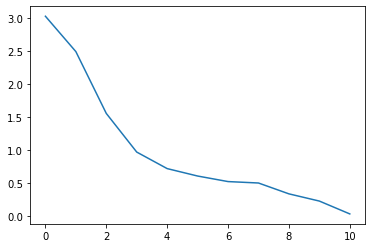

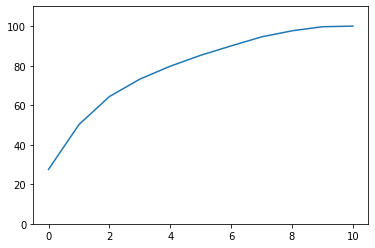

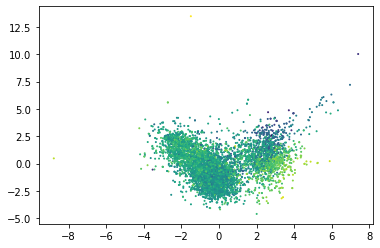

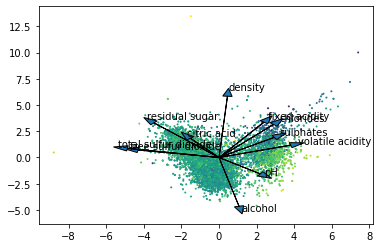

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
wine = pd.read_csv('wine.csv')
data = wine.iloc[:,1:12].values
centered = data - data.mean(axis=0)
zscores = centered / centered.std(axis=0)
correlation_matrix = np.dot(zscores.T, zscores) / (zscores.shape[0] - 1)
print(correlation_matrix)
print(zscores.T@zscores/(zscores.shape[0] - 1))
# the variables are heterogeneous (of diverse origin) and have (quite) different *variances*

# Determining principal components
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
order = eigenvalues.argsort()[::-1]
# argsort sort the index from small to big, so -1 change it from big to small
eigenvalues = eigenvalues[order]
eigenvectors = eigenvectors[:, order]

# 'Scree' plot of eigenvalues
plt.plot(eigenvalues)
plt.show()

# Cumulative percentage of eigenvalues
plt.plot(100 * eigenvalues.cumsum() / sum(eigenvalues))
plt.ylim((0, 110))
plt.show()

# Projection of data onto components (rotation of data)
projections = np.dot(zscores, eigenvectors)
projections = zscores @ eigenvectors
plt.scatter(projections[:,0], projections[:,1], c=projections[:, 2], s=1)
plt.show()

# Biplot showing projections and directions of original variables
variables = wine.columns[1:12]
plt.scatter(projections[:,0], projections[:,1], c=projections[:, 2], s=1)
for var, (x,y) in zip(variables, 10*eigenvectors[:, :2]):
    plt.arrow(0, 0, x, y, head_width=0.5)
    plt.text(1.1*x, 1.1*y, var)
plt.show()

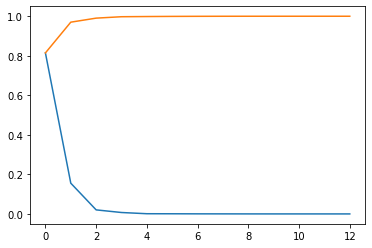

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/ffzs/dataset/master/boston/train.csv')
X = df.iloc[:, 1:-1].values
y = df.iloc[:, [-1]].values
pca_model = PCA()
data_pca = pca_model.fit_transform(X)
pca_model.explained_variance_
pca_model.explained_variance_ratio_
plt.plot(pca_model.explained_variance_ratio_)
ratio_cumsum = np.cumsum(pca_model.explained_variance_ratio_)
plt.plot(ratio_cumsum)


max :  [338.69083701 285.75661088]
min :  [-220.17293342 -111.96953132]


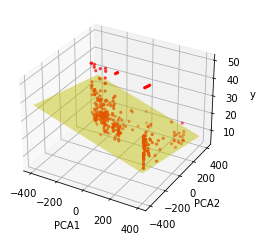

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca[:,0], data_pca[:,1], y, marker='.', color='red')
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("y")

from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()
# choose the first 2 components
model_linear.fit(data_pca[:,0:2],y)
y_pred = model_linear.predict(data_pca[:,:2])
coefs = model_linear.coef_[0]
intercept = model_linear.intercept_[0]
print("max : ",(np.max(data_pca[:,0:2],axis = 0)))
print("min : ",(np.min(data_pca[:,0:2],axis = 0)))
X = np.arange(-400, 400,1)
Y = np.arange(-400, 400,1)
x1s, x2s = np.meshgrid(X, Y)
ys = x1s*coefs[0]+x2s*coefs[1]+intercept
ax.plot_surface(x1s,x2s,ys,color='Yellow',alpha=0.5)
plt.show()

In [74]:
wine

,Type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,R,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,R,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,R,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,R,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,R,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,W,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,W,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,W,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,W,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [78]:
from pca import pca
wine = pd.read_csv('wine.csv')
model = pca(n_components=6, normalize=True)
results = model.fit_transform(wine.drop(["Type"],axis=1))

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [12] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [79]:
loadings = results["loadings"]
loadings

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
PC1,-0.256929,-0.394931,0.146461,0.318905,-0.313450,0.422691,0.474420,-0.092438,-0.208070,-0.299852,-0.058924,0.087476
PC2,0.261843,0.105198,0.144093,0.342585,0.269770,0.111179,0.143948,0.554920,-0.152922,0.119634,-0.492727,-0.296601
PC3,0.467486,-0.279689,0.588076,-0.075502,0.046769,-0.098998,-0.101281,-0.051563,-0.406787,0.168691,0.212931,0.295838
PC4,-0.143964,-0.080058,0.055510,0.112456,0.165290,0.303306,0.132232,0.150579,0.471478,0.588020,0.080032,0.472439
PC5,0.165363,0.147774,-0.234621,0.507921,-0.393897,-0.248452,-0.223967,0.330357,-0.001458,-0.193246,0.116023,0.459129
PC6,-0.030037,0.382664,-0.362248,0.063317,0.425442,0.283180,0.106769,-0.154553,-0.560897,0.020141,0.169475,0.277888


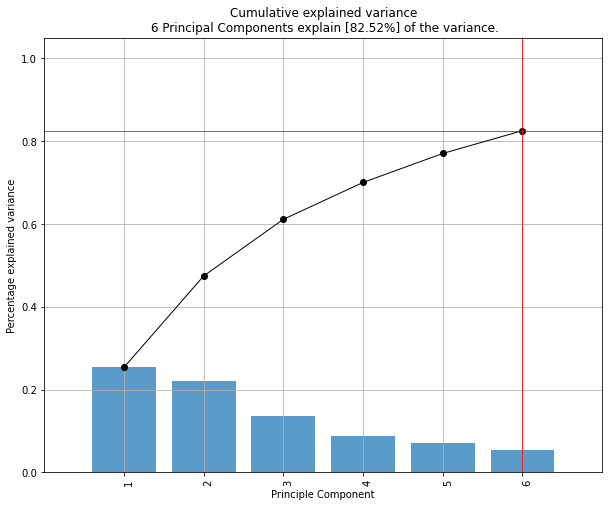

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 6 Principal Components explain [82.52%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [81]:
model.plot(figsize=(10,8))

[pca] >Plot PC1 vs PC2 with loadings.


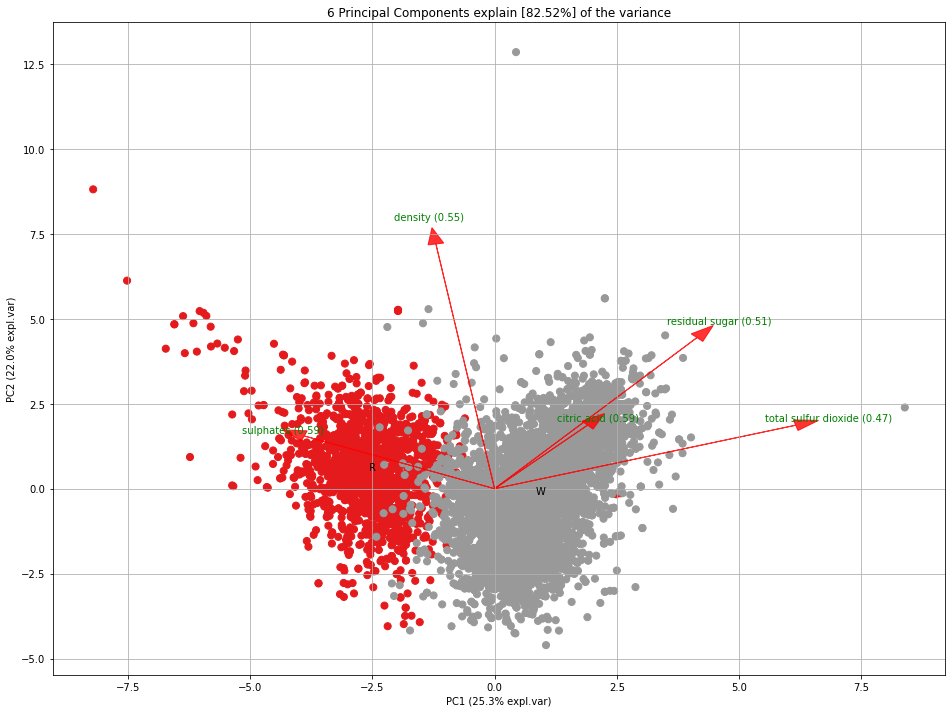

(<Figure size 1152x864 with 1 Axes>,
 <AxesSubplot:title={'center':'6 Principal Components explain [82.52%] of the variance'}, xlabel='PC1 (25.3% expl.var)', ylabel='PC2 (22.0% expl.var)'>)

In [82]:
model.biplot(n_feat=5, legend=False, figsize=(16,12), y=type, label=True)

## Factor Analysis (FA)
Factor analysis differs from PCA in that it assumes that the data and the covariances are the result of a  small, typically known, number of underlying (hidden or latent) variables. The aim of FA is to identify the nature of these underlying variables. It is further assumed that each of these latent variables has a _simple structure_, which means that it is coupled to a limited number of the direct observable variables. 

FA starts with performing PCA, followed by selection of a number of components that is assumed to span the _latent variable space_. These components are then rotated in the _variable space_, such that each component has a structure that is as simple as possible. A popular method for this is the _varimax_ rotation that maximizes the sum of variances over the _rows_ of the selected components. Other rotations are _orthomax_ and _quartimax_. All three preserve the orthogonality of the components. The resulting simple structures of the components make it typically more easy to interpret the results than is the case with PCA. Oblique rotations, which allow non-orthogonal components, are sometimes also used, but these may again be difficult to interpret.

In [ ]:
def varimax(components, gamma=1, maxiter=20, tol=1e-8):
    """Perform VariMax (gamma=1) or OrthoMax (gamma=0) rotation on components"""
    p,k = components.shape
    R   = np.eye(k)
    f   = float(gamma)/p
    d   = 0
    for i in range(maxiter):
        d_old = d
        L = np.dot(components, R)
        A = L**3 - f * (L*(L**2).sum(axis=0))**2
        U,s,V = np.linalg.svd(np.dot(components.T,A))
        R = np.dot(U,V)
        d = sum(s)
        if (d - d_old)**2 < tol: 
            break
    return np.dot(components, R)

In [ ]:
# Using the wine example 
V = varimax(eigenvectors[:, :3])
# Normally we will choose the eigenvectors which are higher than 1
fa_projections = np.dot(zscores, V)
plt.scatter(fa_projections[:,0], fa_projections[:,1], c=fa_projections[:, 2], s=1)
for var, (x,y) in zip(variables, 10*V[:, :2]):
    plt.arrow(0, 0, x, y, head_width=0.5)
    plt.text(1.1*x, 1.1*y, var)
plt.show()

## Singular Value Decomposition (SVD)
The short explanation of the SVD is that it aims at finding two rotation matrices $\bf{U}$ and $\bf{V}$ for two data set $\bf{X}$ and $\bf{Y}$, such that the matrix of inner products of the two $({\bf{XU}})^T{\bf{YV}}$ after rotation is diagonal.

While the PCA rotation of one dataset rotates it such that the first component has the largest variance, the second the second largest variance, and so on, the SVD rotations rotate both data sets such that the two first components have the highest variance, the two second components have the second highest covariance, and so on. Likewise, where the covariance between any two non-equal components is zero in PCA, any two components from either data set, which have unequal indices have zero covariance in SVD. In this context, the SVD is sometimes explicitly called 'Maximum Covariance Analysis'.

In the above sense, the SVD applies to cross-covariance matrices (covariance matrices from the inner product of two data sets). However, every matrix could be considered or even written as a cross-covariance matrix of some two data matrices, and the SVD is thus not restricted to actual ones, but can be used to write any matrix as two 'rotation' (singular vector) matrices and a diagonal matrix of singular values:

$$
{\bf{S}} = {\bf{U}}{\bf{\Lambda}}{\bf{V}}^T
$$

$$
V = {S^T}S
$$
$$
U = S{S^T}
$$
$$
{\bf{\Lambda}} = 
$$

In [ ]:
M = [[1,0,0,0,2], 
     [0,0,3,0,0],
     [0,0,0,0,0],
     [0,2,0,0,0]]
M = np.array(M)
eigenvalues, eigenvectors = np.linalg.eig(M.T @ M)
order = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[order]
V = eigenvectors[:, order]
sigma = np.diag(np.sqrt(eigenvalues))

eigenvalues, eigenvectors = np.linalg.eig(M @ M.T)
order = eigenvalues.argsort()[::-1]
U = eigenvectors[:, order]
print(V.T)
print(sigma)
print(U)

# U,sigma,VT = np.linalg.svd(M)
# print(U)
# print(np.diag(sigma))
# print(VT)

## Procrustes Analysis (PA)
https://en.wikipedia.org/wiki/Procrustes_analysis

Procrustes Analysis aims at finding the optimal superposition of two datasets of equivalent points by translation, rotation and scaling. The result of the operation is that the sum of squared distances between equivalent points is minimized. Applications include, e.g., matching images.

The problem can be phrased as having two datasets $\bf{X}$ and $\bf{Y}$ of equal dimensions, with matched rows. It's easiest to first center both data sets, because that settles the translation part. Solving the problem then involves minimizing the $D^2$, the sum of squared distances

$$
D^2 = \text{tr}\,({\bf{X}} - {\bf{YR}})^T({\bf{X}} - {\bf{YR}})
$$

This is just the Euclidean distance and can be expanded to

$$
D^2 = \text{tr}\,{\bf{X}}^T{\bf{X}} + \text{tr}\,({\bf{YR}})^T{\bf{YR}} 
-\text{tr}\, {\bf{X}}^T{\bf{YR}} -\text{tr}\, {\bf{YR}}^T{\bf{X}}
$$

Now note that transposition does not change the trace, so the last two terms are equal and can be replaced. Further note that the inner product of a matrix does not change with rotation, so we can rewrite the above to 

$$
D^2 = \text{tr}\,{\bf{X}}^T{\bf{X}} + \text{tr}\,{\bf{Y}}^T{\bf{Y}} 
-2 \text{tr}\, {\bf{X}}^T{\bf{YR}} 
$$

So we obtain an equation for $D^2$ that is to be minimized with respect to the rotation $R$, and that rotation only occurs in the last term. The first two terms are constant for every $R$, and since the last term is a subtraction, minimizing $D^2$ is thus equal to maximizing the trace of the matrix ${\bf{X}}^T{\bf{YR}}$. Now any matrix has maximal trace if all the information is on the diagonal, and this can be done with the SVD

$$
{\bf{X}}^T{\bf{Y}} = {\bf{U \Lambda V}}^T
$$

and

$$
\text{tr} \, {\bf{U}}^T{\bf{X}}^T{\bf{Y}}{\bf{V}} = \text{tr} \, {\bf{\Lambda}}
$$

At this point it helps to know that the trace of a matrix product does not change if a matrix is shifted from the left side to the right, or vice versa, so we can change the equation above to 

$$
\text{tr} \, {\bf{X}}^T{\bf{Y}}{\bf{V}}{\bf{U}}^T = \text{tr} \, {\bf{\Lambda}}
$$

and it becomes evident that the distance minimizing rotation ${\bf{R}} = {\bf{VU}}^T$.

In [ ]:
from scipy.spatial import procrustes

## Principal Component Regression (PCR)
collinearity, in statistics, correlation between predictor variables (or independent variables), such that they express a linear relationship in a regression model.
if there is a strong correlation between to variable we cannot use multilinear regression.
we can select the first principal component for linear regression to prevent loss too many information.

## Partial Least Squares Regression (PLSR)
PLS is used to find the fundamental relations between two matrices (X and Y), i.e. a latent variable approach to modeling the covariance structures in these two spaces. A PLS model will try to find the multidimensional direction in the X space that explains the maximum multidimensional variance direction in the Y space. PLS regression is particularly suited when the matrix of predictors has more variables than observations, and when there is multicollinearity among X values. By contrast, standard regression will fail in these cases (unless it is regularized).

#### Multivariate Multiple Regression is the multivariate counterpart of Multiple Regression: it models multiple independent variables to explain multiple dependent variables. Although Multivariate Multiple Regression works fine in many cases, it cannot handle multicollinearity. If your dataset has many correlated predictor variables, you will need to move to Partial Least Squares Regression.

#### In Partial Least Squares, the identified components of the independent variables while be defined as to be related to the identified components of the dependent variables. In Principal Components Regression, the components are created without taking the dependent variables into account. When the goal is to find a dependence relation between dependent and independent variables, Partial Least Squares has an advantage here.

## Multidimensional Scaling (MDS)

https://en.wikipedia.org/wiki/Multidimensional_scaling

Multidimensional scaling or Principal Coordinate Analysis (PCoorA) is an application of PCA on a *dissimilarity matrix*, rather than on a covariance matrix, which is more like a *similarity matrix*. 

Say we have an $n$ by $n$ dissimilarity matrix from $n$ observations. The objective of MDS is then finding $n$ vectors in a $k$-dimensional space such that the dissimilarity matrix of these new vectors is as close as possible to the original matrix. In casual terms, MDS assigns coordinates to observations based on dissimilarities. 

The objective of MDS is not too different from that of PCA on a covariance matrix. If we have an $n$ by $n$ covariance matrix from $n$ observations, then the objective of PCA can be phrased as assigning $k$-dimensional coordinates to these observations, such that the covariance matrix of these coordinates is as close as possible to the original one for any choice of $k$.

To illustrate the MDS in light of the relation with standard PCA, let $\bf{a}$, $\bf{b}$, $\bf{c}$, $\bf{d}$, and $\bf{e}$ denote five vectors in some variable space. We here assume that this is a regular, say Cartesian, space. The distance squared between any two points can be written (here for $\bf{a}$ and $\bf{b}$) as 

$$
d_{ab}^2 = ({\bf{a}} - {\bf{b}})^T ({\bf{a}} - {\bf{b}})
= {\bf{a}}^T {\bf{a}} + {\bf{b}}^T {\bf{b}} - 2 {\bf{a}}^T{\bf{b}}
$$

The matrix of all distances squared can then be written as 

$$
{\bf{D}}^2 = \begin{pmatrix}
{\bf{a}}^T {\bf{a}} + {\bf{a}}^T {\bf{a}} - 2 {\bf{a}}^T{\bf{a}} &
\cdots &
{\bf{a}}^T {\bf{a}} + {\bf{e}}^T {\bf{e}} - 2 {\bf{a}}^T{\bf{e}} \\
\vdots & \ddots & \vdots \\
{\bf{e}}^T {\bf{e}} + {\bf{a}}^T {\bf{a}} - 2 {\bf{e}}^T{\bf{a}} &
\cdots &
{\bf{e}}^T {\bf{e}} + {\bf{e}}^T {\bf{e}} - 2 {\bf{e}}^T{\bf{e}} 
\end{pmatrix}
$$

Because the distances are shift-invariant, we can set any of our points as the origin, so we take $\bf{a}$. But if $\bf{a}$ is the origin, any distance squared with respect to it  will be the inner product of the corresponding point, and the matrix can be rewritten:

$$
{\bf{D}}^2 = \begin{pmatrix}
0 & 
{\bf{b}}^T{\bf{b}} & 
\cdots & 
{\bf{e}}^T{\bf{e}} \\
{\bf{b}}^T{\bf{b}} & 
{\bf{b}}^T {\bf{b}} + {\bf{b}}^T {\bf{b}} - 2 {\bf{b}}^T{\bf{b}} &
\cdots &
{\bf{b}}^T {\bf{b}} + {\bf{e}}^T {\bf{e}} - 2 {\bf{b}}^T{\bf{e}} \\
\vdots & 
\vdots & 
\ddots & 
\vdots \\
{\bf{e}}^T {\bf{e}} &
{\bf{e}}^T {\bf{e}} + {\bf{b}}^T {\bf{b}} - 2 {\bf{e}}^T{\bf{b}} &
\cdots &
{\bf{e}}^T {\bf{e}} + {\bf{e}}^T {\bf{e}} - 2 {\bf{e}}^T{\bf{e}} 
\end{pmatrix}
$$

Now subtracting the top row from all rows and the first column from all columns and dividing by $-2$ gives the matrix of sums-of-squares and crossproducts $\bf{S}$

$$
{\bf{S}} = \begin{pmatrix}
0 & 0 & 0 & 0 & 0 \\
0 & {\bf{b}}^T{\bf{b}} & {\bf{b}}^T{\bf{c}} & {\bf{b}}^T{\bf{d}} & {\bf{b}}^T{\bf{e}} \\
0 & {\bf{c}}^T{\bf{b}} & {\bf{c}}^T{\bf{c}} & {\bf{c}}^T{\bf{d}} & {\bf{c}}^T{\bf{e}} \\
0 & {\bf{d}}^T{\bf{b}} & {\bf{d}}^T{\bf{c}} & {\bf{d}}^T{\bf{d}} & {\bf{d}}^T{\bf{e}} \\
0 & {\bf{e}}^T{\bf{b}} & {\bf{e}}^T{\bf{c}} & {\bf{e}}^T{\bf{d}} & {\bf{e}}^T{\bf{e}} \\
\end{pmatrix}
$$

With ${\bf{a}} = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix}$ it is obvious that this matrix is obtained as ${\bf{X}}^T{\bf{X}}$ with the coordinates ${\bf{X}} = \begin{pmatrix} {\bf{a}} \\ \vdots \\ {\bf{e}} \end{pmatrix}$ with any rotation. Vice versa, the eigen decomposition must then yield those coordinates with some rotation:

$$
{\bf{S}} = {\bf{PD}}^{\frac{1}{2}}{\bf{DP}} = {\bf{R}}^T{\bf{X}}^T{\bf{X}}{\bf{R}}
$$

The rotation is not arbitrary, but corresponds to the rotation of the points, such that the first coordinate has maximal inner product, the second coordinate has the next maximal inner product, etc. However, the coordinates thus assigned to the observations have the origin at one of the points. The choice is arbitrary, but affects the rotation. The result is equal to the result from PCA if the origin is set at the center of the distribution. Then the first coordinate corresponds to the direction of maximal distances between the observations. 

Gower (1966) presented the method as Principal Coordinate Analysis with a method to infer the center of mass from the distance matrix and set that as origin. 

The method is particularly useful if distances between observations are more easily determined or have clearer meaning than actual coordinates. It is often used prior to clustering, since it is typically possible to use a space of limited dimensions to capture as much as possible of the dissimilarities.

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
with open('Supplementary_file_1.tps') as tps:
    for _ in range(60):
        pass
        # print(tps.readline(), end='')
    dino = []
    for line in tps:
        if line.startswith('LM='):
            n = int(line.split('=')[1])
            dino.append([ tps.readline().split() for _ in range(n) ])
dino = np.array(dino, dtype=float)
# print(dino.shape)
for entry in dino:
    plt.plot(entry[:, 0], entry[:, 1])
plt.show()

def msd(a, b):
    distsq = (a ** 2).sum() + (b** 2).sum()
    distsq -= np.linalg.svd(a.T @ b, compute_uv=False).sum()
    return distsq / len(a)

D = np.zeros((len(dino), len(dino)))
for i1, d1 in enumerate(dino):
    for i2, d2 in enumerate(dino):
        D[i1, i2] = msd(d1, d2)
plt.imshow(D)
plt.show()

m = D.mean(axis=0)
A = -0.5 * (D - m[:, None] - m[None, :] + m.mean())

vals, vecs = np.linalg.eig(A)
order = vals.argsort()[::-1]

plt.scatter(np.arange(len(vals)) + 1, vals[order].cumsum()/vals.sum())
plt.show()
princo = vecs[:, order[:5]] * vals[order[:5]] ** 0.5

fig, ax = plt.subplots()
plt.scatter(*princo[:, :2].T)
plt.show()
fig, ax = plt.subplots()
ax.set_aspect('equal')
for din, xy  in zip(dino, princo):
    plt.scatter(xy[0], xy[1])
    plt.plot(*(din/50 + xy[:2]).T, linewidth=0.5)
plt.show()

## Linear Discriminant Analysis (LDA)

https://en.wikipedia.org/wiki/Linear_discriminant_analysis

Linear Discriminant Analysis finds the component that maximizes the separation of two groups $X$ and $Y$ in the data. If $\bar{\bf{x}}$ and $\bar{\bf{y}}$ are the respective means of the two groups and $\bf{S}$ is the *pooled covariance matrix*

$$
{\bf{S}} = \frac{(n_x - 1){\bf{S}}_x + (n_y - 1){\bf{S}}_y}{n_x + n_y - 2}
$$

then LDA gives a single component $\bf{a}$

$$
{\bf{a}} = {\bf{S}}^{-1} (\bar{\bf{x}} - \bar{\bf{y}})
$$

The scores of $X$ and $Y$ on $\bf{a}$ will have distributions with means and variances such that a t-test will give the maximum possible (squared) critical value. 

It is possible to deflate the data to remove the projection onto the LDA component. A subsequent PCA on the deflated data gives the principal directions of variance that are orthogonal to the direction of maximum discrimination. Plotting the projection on the discriminating axis and on the first pc of the deflated data then allows comparing the variance contributions associated with either direction and so assess the significance of the separation. A caveat of LDA is that the difference found to be most significant may be in directions that are themselves not very relevant in terms of data spread.

LDA is also closely related to principal component analysis (PCA) and factor analysis in that they both look for linear combinations of variables which best explain the data. LDA explicitly attempts to model the difference between the classes of data. PCA, in contrast, does not take into account any difference in class, and factor analysis builds the feature combinations based on differences rather than similarities. Discriminant analysis is also different from factor analysis in that it is not an interdependence technique: a distinction between independent variables and dependent variables (also called criterion variables) must be made.

LDA works when the measurements made on independent variables for each observation are continuous quantities. When dealing with categorical independent variables, the equivalent technique is discriminant correspondence analysis.

Discriminant analysis is used when groups are known a priori (unlike in cluster analysis). Each case must have a score on one or more quantitative predictor measures, and a score on a group measure. In simple terms, discriminant function analysis is classification - the act of distributing things into groups, classes or categories of the same type.

In [ ]:
# Preparation and reading of data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
wine = pd.read_csv('wine.csv')
grandmean = wine.values[:, 1:11].mean(axis=0)

white = np.array(wine[wine.Type == 'W'].values[:, 1:12], dtype=float)
red = np.array(wine[wine.Type == 'R'].values[:, 1:12], dtype=float)

mw = white.mean(axis=0)
mr = red.mean(axis=0)

nw = white.shape[0]
nr = red.shape[0]

Sw = np.cov(white.T)
Sr = np.cov(red.T)

# The pooled covariance matrix
Sp = ((nr - 1) * Sr + (nw - 1) * Sw) / (nr + nw - 2)

# The discriminant axis
a = np.linalg.inv(Sp) @ (mw - mr)
a /= np.sqrt((a ** 2).sum())

# Projecting the data onto the discriminant axis
tw = white @ a
tr = red @ a

# Deflate both groups
Ew = white - tw[:, None] * a[None, :]
Er = red - tr[:, None] * a[None, :]

# Combine
X = np.concatenate((Ew, Er), axis=0)
S = np.cov(X.T)
vals, vecs = np.linalg.eig(S)
order = vals.argsort()[::-1]
vecs = vecs[:, order]
vals = vals[order]
Tw = white @ vecs
Tr = red @ vecs

# Plot
plt.scatter(tr, Tr[:, 0], s=1, c="red")
plt.scatter(tw, Tw[:, 0], s=1, c="orange")
plt.xlabel("Discriminant axis")
plt.ylabel("Non-discriminant PC 1")    
plt.show()